In [31]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from matplotlib import pyplot as plt

In [17]:
df = pd.read_csv('Words.csv')

In [18]:
df

,id,word,definition,createdAt,updatedAt
0,1,abacı,Aba yapan veya satan kimse,2023-05-09 22:06:38,2023-05-09 22:06:53
1,2,abacı,Abadan giyecek yapan veya satan kimse,2023-05-09 22:06:38,2023-05-09 22:06:53
2,3,abacı,Asalak,2023-05-09 22:06:38,2023-05-09 22:06:53
3,4,abacı,Bedavacı,2023-05-09 22:06:38,2023-05-09 22:06:53
4,5,abadi,"Açık saman renginde, ipekten yapılan, yarı mat...",2023-05-09 22:06:38,2023-05-09 22:06:53
...,...,...,...,...,...
50923,50924,şırınga,Enjektör,2023-05-09 22:06:38,2023-05-09 22:06:53
50924,50925,şırıngacı,Şırınga yapan kimse,2023-05-09 22:06:38,2023-05-09 22:06:53
50925,50926,şırıngacı,Uyuşturucuyu iğne ile vücuda zerk eden kimse,2023-05-09 22:06:38,2023-05-09 22:06:53
50926,50927,şıvgın,Budanmış yaşlı ağaçların budanan yerlerinden ç...,2023-05-09 22:06:38,2023-05-09 22:06:53


In [19]:
# df['definiton'] to lower case
df['definition'] = df['definition'].str.lower()

In [20]:
# dropping the duplicate df['word'] values whilst keeping the first occurence
df = df.drop_duplicates(subset=['word'], keep='first')

In [21]:
# dropping createdAt and updatedAt columns
df = df.drop(['createdAt', 'updatedAt'], axis=1)

In [22]:
# comparing df['word'] and df['definition'] columns using fuzz.ratio
df['ratio'] = df.apply(lambda x: fuzz.ratio(x['word'], x['definition']), axis=1)

In [23]:
# comparing df['word'] and df['definition'] columns using fuzz.partial_ratio
df['partial_ratio'] = df.apply(lambda x: fuzz.partial_ratio(x['word'], x['definition']), axis=1)

In [24]:
# comparing df['word'] and df['definition'] columns using fuzz.token_sort_ratio
df['token_sort_ratio'] = df.apply(lambda x: fuzz.token_sort_ratio(x['word'], x['definition']), axis=1)

In [25]:
# comparing df['word'] and df['definition'] columns using fuzz.token_set_ratio
df['token_set_ratio'] = df.apply(lambda x: fuzz.token_set_ratio(x['word'], x['definition']), axis=1)

In [26]:
# comparing df['word'] and df['definition'] columns using fuzz.WRatio
df['WRatio'] = df.apply(lambda x: fuzz.WRatio(x['word'], x['definition']), axis=1)

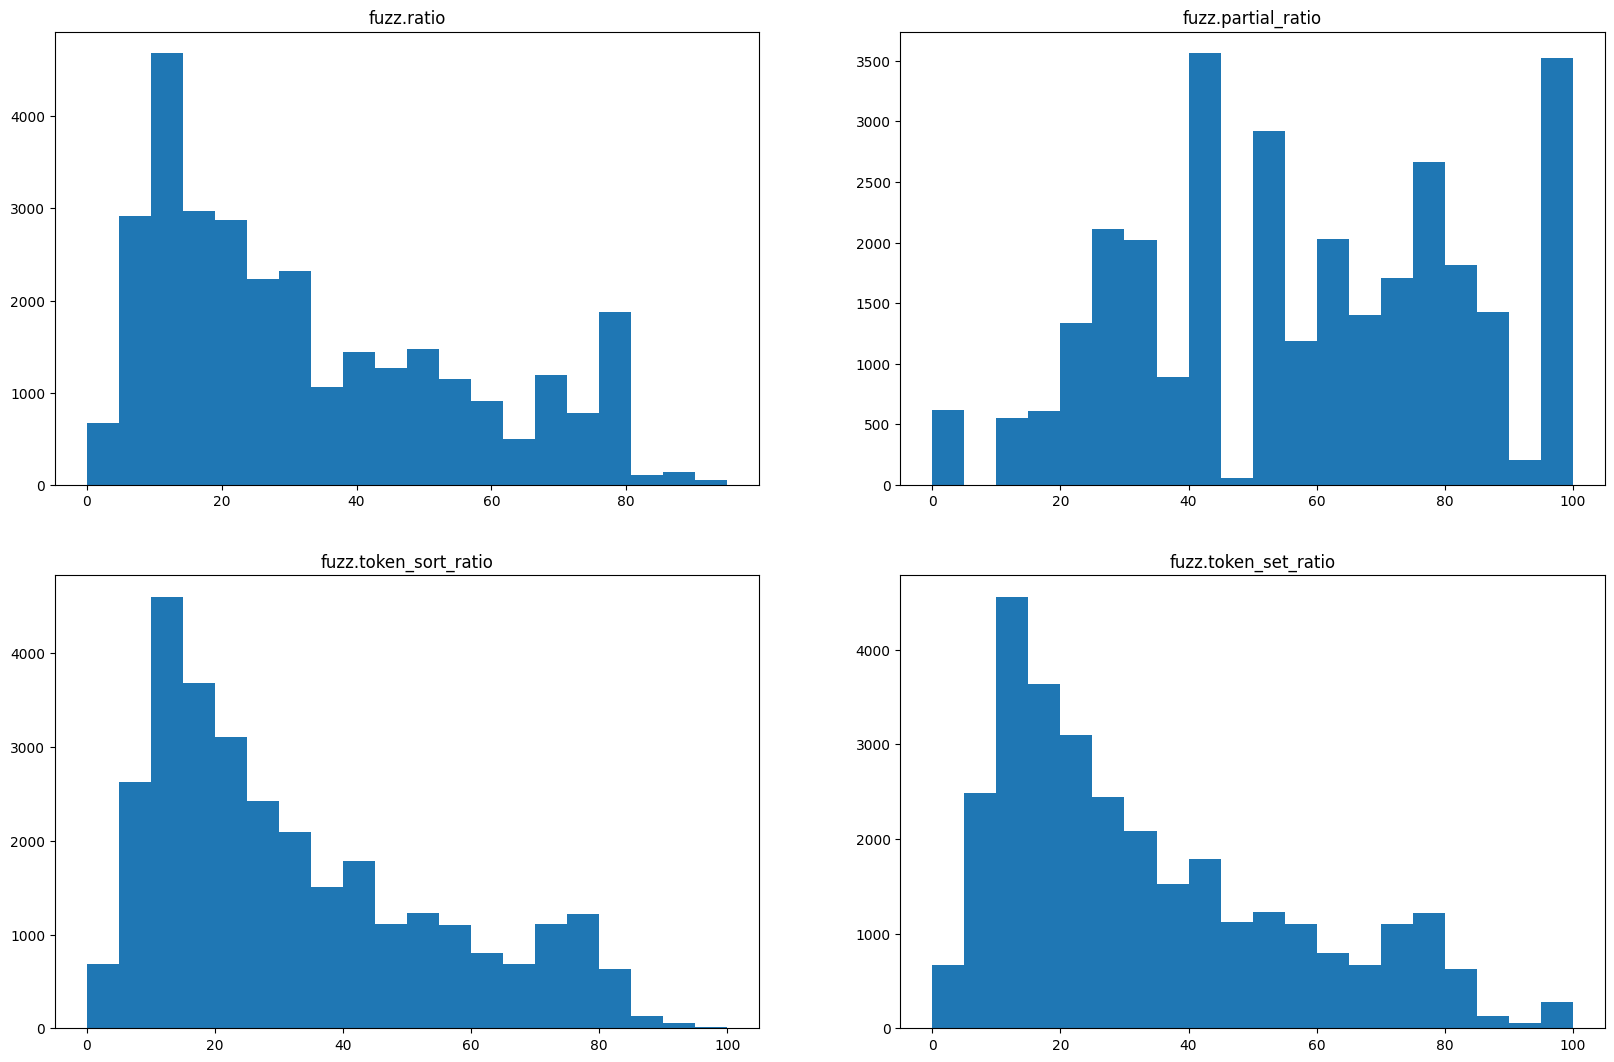

In [32]:
# creating histograms for each fuzz ratio using matplotlib
fg = plt.figure(figsize=(20, 20))
ax1 = fg.add_subplot(321)
ax2 = fg.add_subplot(322)
ax3 = fg.add_subplot(323)
ax4 = fg.add_subplot(324)

ax1.hist(df['ratio'], bins=20)
ax1.set_title('fuzz.ratio')

ax2.hist(df['partial_ratio'], bins=20)
ax2.set_title('fuzz.partial_ratio')

ax3.hist(df['token_sort_ratio'], bins=20)
ax3.set_title('fuzz.token_sort_ratio')

ax4.hist(df['token_set_ratio'], bins=20)
ax4.set_title('fuzz.token_set_ratio')

plt.show()


In [51]:
# dropping the rows where any kind of fuzz ratio is greater than 80
df = df.drop(df[(df['ratio'] > 80) | (df['partial_ratio'] > 80) | (df['token_sort_ratio'] > 80) | (df['token_set_ratio'] > 80) | (df['WRatio'] > 80)].index)

In [54]:
# dropping the rows where partial_ratio is greater than 70
df = df.drop(df[(df['partial_ratio'] >= 70)].index)

In [55]:
# df where partial ratio is not 100, ordered by partial ratio
df.sort_values(by=['partial_ratio'], ascending=False)

,id,word,definition,ratio,partial_ratio,token_sort_ratio,token_set_ratio,WRatio
13148,13149,falaka,ceza olarak ayak tabanlarına vurmakta kullanıl...,6,67,6,6,40
2787,2788,avantacı,"çıkarcı, beleşçi, bedavacı",29,67,40,40,60
25194,25195,kusmak,"i̇çinde birikmiş kinini, öfkesini söyleyerek a...",16,67,17,17,40
2845,2846,avuntu,"acı bir olayı unutturmaya çalışma, acısını haf...",14,67,17,17,40
40514,40515,tensel,cinsel,67,67,67,67,67
...,...,...,...,...,...,...,...,...
46152,46153,yılgı,fobi,0,0,0,0,0
13385,13386,fena,çok,0,0,0,0,0
8717,8718,delgi,matkap,0,0,0,0,0
7483,7484,carta,yellenme,0,0,0,0,0


In [56]:
# shuffling the df
df = df.sample(frac=1).reset_index(drop=True)

In [58]:
df.to_csv('Words_Improved.csv', index=False)

# reset index